In [ ]:
! unzip /content/drive/MyDrive/test_dataset.zip

Archive:  /content/drive/MyDrive/test_dataset.zip
   creating: test_dataset/
   creating: test_dataset/structure_5/
  inflating: test_dataset/structure_5/sub.vasp  
  inflating: test_dataset/structure_5/OSZICAR  
  inflating: test_dataset/structure_5/POSCAR  
  inflating: test_dataset/structure_5/PCDAT  
  inflating: test_dataset/structure_5/vaspout.h5  
  inflating: test_dataset/structure_5/EIGENVAL  
  inflating: test_dataset/structure_5/INCAR  
  inflating: test_dataset/structure_5/stdout.31657  
  inflating: test_dataset/structure_5/XDATCAR  
  inflating: test_dataset/structure_5/DOSCAR  
 extracting: test_dataset/structure_5/CHG  
  inflating: test_dataset/structure_5/POTCAR  
  inflating: test_dataset/structure_5/KPOINTS  
  inflating: test_dataset/structure_5/vasprun.xml  
  inflating: test_dataset/structure_5/PROCAR  
  inflating: test_dataset/structure_5/IBZKPT  
  inflating: test_dataset/structure_5/CONTCAR  
 extracting: test_dataset/structure_5/REPORT  
 extracting: test_da

# Installation

In [ ]:
pip install chgnet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 47.6 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19172 sha256=2378af884b1d82ab0908422d14c

In [ ]:
pip install pymatgen==2023.9.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of emmet-core to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of emmet-core to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 18.7 MB/s eta 0:00:00
   ━━

In [1]:
from chgnet.model import CHGNet
import numpy as np
from pymatgen.core import Structure
import os
from chgnet.utils import read_json
from chgnet.data.dataset import StructureData

# Parse DFT outputs to CHGNet readable formats

In [5]:
from chgnet.utils import parse_vasp_dir

parent_dir = "/content/test_dataset/"
os.makedirs("test_data", exist_ok=True)

required_files = ["vasprun.xml", "OSZICAR"]

ranges = [(0, 10)]

for start, end in ranges:
    for i in range(start, end + 1):
        vasp_dir = f"structure_{i}"
        vasp_path = os.path.join(parent_dir, vasp_dir)
        saved_path = "test_data"

        if os.path.isdir(vasp_path):
            if all(os.path.exists(os.path.join(vasp_path, f)) for f in required_files):
                try:
                    dataset_dict = parse_vasp_dir(
                        vasp_path,
                        save_path=os.path.join(saved_path, f"chgnet_dataset_{i}.json")
                    )
                    print(f"Successfully converted {vasp_dir}")
                except Exception as e:
                    print(f"Failed to convert {vasp_dir}: {e}")
            else:
                print(f"Skipping {vasp_dir}: Missing required VASP files.")
        else:
            print(f"{vasp_dir} is not a directory or does not exist.")

Successfully converted structure_0
Successfully converted structure_1
Successfully converted structure_2
Successfully converted structure_3
Successfully converted structure_4
Successfully converted structure_5
Successfully converted structure_6
Successfully converted structure_7
Successfully converted structure_8
Successfully converted structure_9
Successfully converted structure_10


In [6]:
directories_and_ranges = [
    {
        "directory": "test_data",
        "ranges": [(0, 10)]
    }
]

all_structures = []
all_energies = []
all_forces = []
all_stresses = []
all_magmoms = []

for item in directories_and_ranges:
    parent_directory = item["directory"]
    ranges = item["ranges"]

    for start, end in ranges:
        for i in range(start, end + 1):
            json_path = os.path.join(parent_directory, f"chgnet_dataset_{i}.json")

            if os.path.exists(json_path):
                try:
                    dataset_dict = read_json(json_path)
                    print(f"Successfully read data from {json_path}")

                    structures = [Structure.from_dict(struct) for struct in dataset_dict["structure"]]
                    energies = dataset_dict["energy_per_atom"]
                    forces = dataset_dict["force"]
                    stresses = dataset_dict.get("stress") or None
                    magmoms = dataset_dict.get("magmom") or None

                    all_structures.extend(structures)
                    all_energies.extend(energies)
                    all_forces.extend(forces)

                    if stresses:
                        all_stresses.extend(stresses)
                    if magmoms:
                        all_magmoms.extend(magmoms)

                except Exception as e:
                    print(f"Failed to extract data from {json_path}: {e}")
            else:
                print(f"No json file found at {json_path}")

print(f"Total structures extracted: {len(all_structures)}")

dataset = StructureData(
    structures=all_structures,
    energies=all_energies,
    forces=all_forces,
    stresses=all_stresses if all_stresses else None,
    magmoms=all_magmoms if all_magmoms else None
)

# 打印最终的数据集大小
print(f"StructureData imported {len(dataset.structures)} structures")


Successfully read data from test_data/chgnet_dataset_0.json
Successfully read data from test_data/chgnet_dataset_1.json
Successfully read data from test_data/chgnet_dataset_2.json
Successfully read data from test_data/chgnet_dataset_3.json
Successfully read data from test_data/chgnet_dataset_4.json
Successfully read data from test_data/chgnet_dataset_5.json
Successfully read data from test_data/chgnet_dataset_6.json
Successfully read data from test_data/chgnet_dataset_7.json
Successfully read data from test_data/chgnet_dataset_8.json
Successfully read data from test_data/chgnet_dataset_9.json
Successfully read data from test_data/chgnet_dataset_10.json
Total structures extracted: 440
StructureData imported 440 structures
StructureData imported 440 structures


In [7]:
print(len(all_structures))
print(len(all_energies))
print(len(all_forces))
print(len(all_stresses))
print(len(all_magmoms))

440
440
440
440
440


In [8]:
from pymatgen.entries.compatibility import MaterialsProject2020Compatibility
from pymatgen.entries.computed_entries import ComputedStructureEntry
from pymatgen.core.structure import Structure

Mn_correction_in_TMO = -1.668
oxide_correction = -0.687

corrected_energies = []

ranges = list(range(0, len(all_structures)))

for idx, i in enumerate(ranges):
    structure = all_structures[i]

    vasp_raw_energy = all_energies[idx]*structure.num_sites

    num_Li = structure.composition.get("Li", 0)
    num_Mn = structure.composition.get("Mn", 0)
    num_Ti = structure.composition.get("Ti", 0)
    num_O = structure.composition.get("O", 0)

    corrected_energy = (
        vasp_raw_energy + num_Mn * Mn_correction_in_TMO + num_O * oxide_correction
    )

    corrected_energies.append(corrected_energy / structure.num_sites)

print(len(corrected_energies))

440


In [9]:
all_force_x = []
all_force_y = []
all_force_z = []

for force_array in all_forces:
    for x, y, z in force_array:
        all_force_x.append(x)
        all_force_y.append(y)
        all_force_z.append(z)

print(f"all_force_x: {len(all_force_x)} values")
print(f"all_force_y: {len(all_force_y)} values")
print(f"all_force_z: {len(all_force_z)} values")

all_force_x: 16088 values
all_force_y: 16088 values
all_force_z: 16088 values


In [10]:
flattened_stresses = []

for stress_matrix in all_stresses:
    for row in stress_matrix:
        flattened_stresses.extend(row)

print(f"Total number of elements: {len(flattened_stresses)}")

flattened_stresses = [-0.1*x for x in flattened_stresses]

Total number of elements: 3960


In [11]:
flattened_magmoms = []

for magmom_list in all_magmoms:
    flattened_magmoms.extend(magmom_list)

print(f"Total number of elements: {len(flattened_magmoms)}")

flattened_magmoms = [abs(x) for x in flattened_magmoms]

Total number of elements: 16088


# Pertrained model

In [12]:
from chgnet.model import CHGNet
from chgnet.trainer import Trainer

model = CHGNet.load()

from tqdm import tqdm
from pymatgen.core.structure import Structure

predict_energy = []
predict_force = []
predict_stress = []
predict_magmom = []


ls = list(range(0, len(all_structures)))

for i in tqdm(ls, desc="Predicting"):
    structure = all_structures[i]
    prediction = model.predict_structure(structure)
    predict_energy.append(prediction["e"])
    predict_force.append(prediction["f"])
    predict_stress.append(prediction["s"])
    predict_magmom.append(prediction["m"])

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu


Predicting: 100%|██████████| 440/440 [06:21<00:00,  1.15it/s]


In [13]:
predict_energy = [float(val) for val in predict_energy]
print(len(predict_energy))

predict_force_x = []
predict_force_y = []
predict_force_z = []

for force_array in predict_force:
    for x, y, z in force_array:
        predict_force_x.append(x)
        predict_force_y.append(y)
        predict_force_z.append(z)

print(f"predict_force_x: {len(predict_force_x)} values")
print(f"predict_force_y: {len(predict_force_y)} values")
print(f"predict_force_z: {len(predict_force_z)} values")

predict_stress = [element for matrix in predict_stress for element in matrix.flatten()]
print(len(predict_stress))

predict_magmom = [item for sublist in predict_magmom for item in sublist]
print(len(predict_magmom))

440
predict_force_x: 16088 values
predict_force_y: 16088 values
predict_force_z: 16088 values
3960
16088


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import max_error, r2_score, root_mean_squared_error, mean_absolute_error

def plot_regression(true_values, predicted_values,
                   unit='eV/atom', scale_factor=1000,
                   property_name='Energy', figsize=(6, 5),
                   text_fontsize=16, label_fontsize=22):
    """
    绘制真实值与预测值的回归图，并显示评估指标

    参数:
    true_values -- 真实值数组
    predicted_values -- 预测值数组
    unit -- 单位字符串 (默认: 'eV/atom')
    scale_factor -- 单位转换因子 (默认: 1000, 用于eV到meV的转换)
    property_name -- 属性名称 (默认: 'Energy')
    figsize -- 图形尺寸 (默认: (8, 6))
    text_fontsize -- 指标文本字体大小 (默认: 16)
    label_fontsize -- 坐标轴标签字体大小 (默认: 22)
    """
    # 计算评估指标
    rmse = root_mean_squared_error(true_values, predicted_values)
    maxer = max_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)

    # 打印指标
    print(f"Train RMSE {scale_factor * rmse:.4f} {unit}")
    print(f"Train MAE {scale_factor * mae:.4f} {unit}")
    print(f"Train MAX {scale_factor * maxer:.4f} {unit}")
    print(f"Train R2 {r2:.4f}")

    # 创建图形
    plt.figure(figsize=figsize)
    ax = plt.gca()

    # 绘制散点图
    ax.scatter(true_values, predicted_values,
               edgecolors='dodgerblue', facecolors='none', s=100)

    # 添加指标文本
    ax.text(
        x=0.05,
        y=0.75,
        s=f"RMSE: {scale_factor * rmse:.4f} {unit}\n"
          f"MAE: {scale_factor * mae:.4f} {unit}\n"
          f"MAX: {scale_factor * maxer:.4f} {unit}\n"
          f"R²: {r2:.4f}",
        transform=ax.transAxes,
        fontsize=text_fontsize,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
    )

    # 绘制对角线
    min_val = min(min(true_values), min(predicted_values))
    max_val = max(max(true_values), max(predicted_values))
    ax.plot([min_val, max_val], [min_val, max_val],
            linestyle='--', color='red', linewidth=2)

    # 设置坐标轴标签
    ax.set_xlabel(f'True {property_name} ({unit})', fontsize=label_fontsize)
    ax.set_ylabel(f'Predicted {property_name} ({unit})', fontsize=label_fontsize)

    # 设置刻度大小
    ax.tick_params(axis='both', which='major', labelsize=14)

    # 添加网格
    ax.grid(True, linestyle='--', alpha=0.7)

    # 添加标题
    plt.title(f'{property_name} Prediction vs True Values', fontsize=16)

    plt.tight_layout()
    plt.show()

    return rmse, maxer, r2, mae


def plot_force_components(all_force_x, predict_force_x,
                         all_force_y, predict_force_y,
                         all_force_z, predict_force_z,
                         unit='eV/Angst', scale_factor=1000,
                         figsize=(18, 6), text_fontsize=14,
                         label_fontsize=16):
    """
    绘制力分量的回归图（X, Y, Z三个方向）

    参数:
    all_force_x, predict_force_x -- X方向的真实值和预测值
    all_force_y, predict_force_y -- Y方向的真实值和预测值
    all_force_z, predict_force_z -- Z方向的真实值和预测值
    unit -- 单位字符串 (默认: 'eV/Angst')
    scale_factor -- 单位转换因子 (默认: 1000)
    figsize -- 图形尺寸 (默认: (18, 6))
    text_fontsize -- 指标文本字体大小 (默认: 14)
    label_fontsize -- 坐标轴标签字体大小 (默认: 16)
    """
    fig, axs = plt.subplots(1, 3, figsize=figsize)

    # 定义计算和绘图的内部函数
    def plot_component(ax, true, predicted, direction):
        rmse = root_mean_squared_error(true, predicted)
        maxer = max_error(true, predicted)
        r2 = r2_score(true, predicted)
        mae = mean_absolute_error(true, predicted)

        ax.scatter(true, predicted,
                   edgecolors='dodgerblue', facecolors='none', s=80)

        ax.text(
            x=0.05,
            y=0.75,
            s=f"RMSE: {scale_factor * rmse:.4f} {unit}\n"
              f"MAE: {scale_factor * mae:.4f} {unit}\n"
              f"MAX: {scale_factor * maxer:.4f} {unit}\n"
              f"R²: {r2:.4f}",
            transform=ax.transAxes,
            fontsize=text_fontsize,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
        )

        min_val = min(min(true), min(predicted))
        max_val = max(max(true), max(predicted))
        ax.plot([min_val, max_val], [min_val, max_val],
                linestyle='--', color='red', linewidth=1.5)

        ax.set_xlabel(f'True Force ({unit})', fontsize=label_fontsize)
        ax.set_ylabel(f'Predicted Force ({unit})', fontsize=label_fontsize)
        ax.set_title(f'{direction} Direction', fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', labelsize=12)

        return rmse, maxer, r2, mae

    # 绘制三个方向的分量
    metrics_x = plot_component(axs[0], all_force_x, predict_force_x, 'X')
    metrics_y = plot_component(axs[1], all_force_y, predict_force_y, 'Y')
    metrics_z = plot_component(axs[2], all_force_z, predict_force_z, 'Z')

    plt.tight_layout()
    plt.suptitle('Force Component Predictions', fontsize=16, y=1.02)
    plt.show()

    return metrics_x, metrics_y, metrics_z

1, energy

Train RMSE 19.3022 meV/atom
Train MAE 18.2558 meV/atom
Train MAX 25.2063 meV/atom
Train R2 0.8487


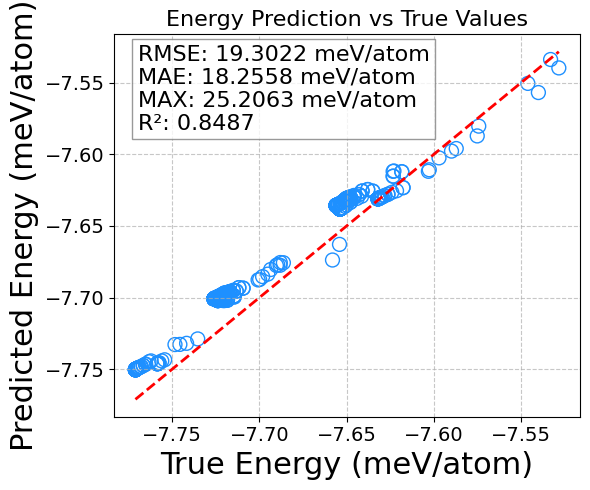

(0.01930223280146073,
 0.025206258376058166,
 0.8487048386984213,
 0.018255790672441673)

In [24]:
plot_regression(
    corrected_energies,
    predict_energy,
    unit='meV/atom',
    scale_factor=1000,
    property_name='Energy'
)

2, force

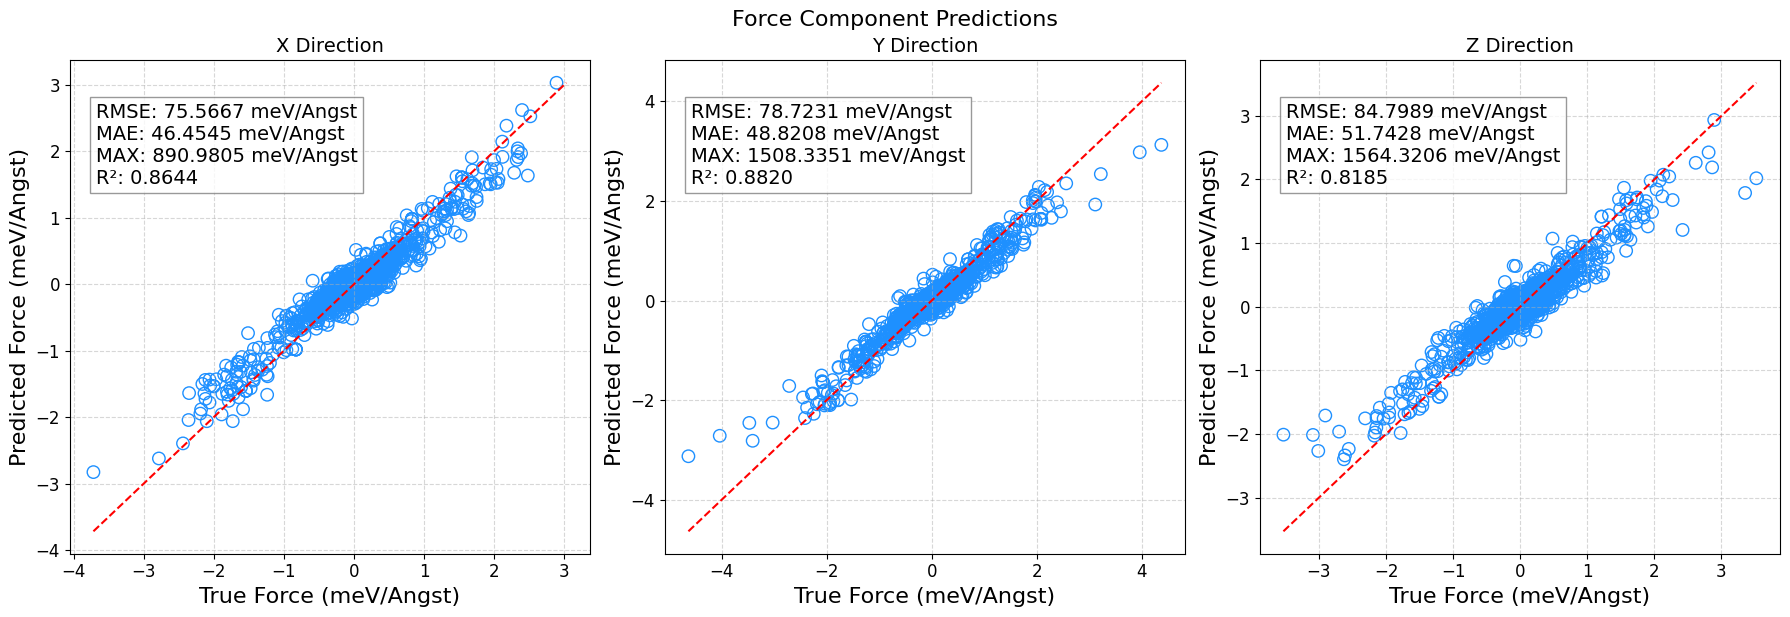

((0.07556669043019947,
  0.890980490755005,
  0.8643912657081418,
  0.04645454697549595),
 (0.07872305247736486,
  1.508335123270264,
  0.8820426395924481,
  0.04882080252146988),
 (0.08479886164167122,
  1.5643205639129638,
  0.8185052507098538,
  0.051742762990117215))

In [26]:
plot_force_components(
    all_force_x, predict_force_x,
    all_force_y, predict_force_y,
    all_force_z, predict_force_z,
    unit='meV/Angst',
    scale_factor=1000
)

3, stress

Train RMSE 0.3724 GPa
Train MAE 0.2298 GPa
Train MAX 3.5860 GPa
Train R2 0.8119


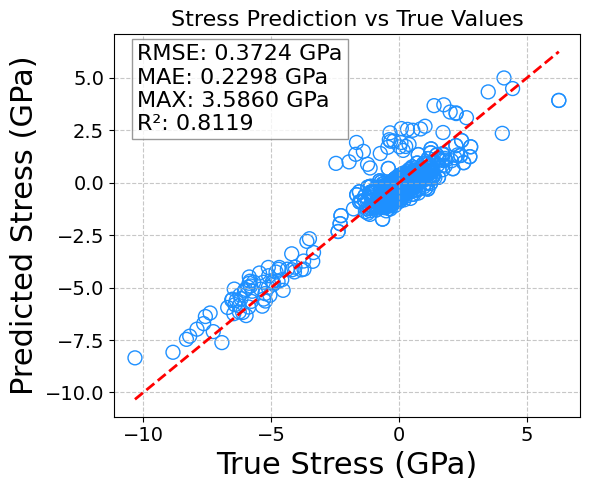

(0.3723728894084563, 3.586002457532471, 0.8118898130206134, 0.2298079599947721)

In [25]:
plot_regression(
    flattened_stresses,
    predict_stress,
    unit='GPa',
    scale_factor=1,  # 不需要单位转换
    property_name='Stress'
)

# Finetuned model

In [27]:
from chgnet.model import CHGNet
from chgnet.trainer import Trainer
import torch

bestE_model_path = "/content/drive/MyDrive/bestE_epoch5_e3_f40_s118_m14.pth.tar"
model = CHGNet()
checkpoint = torch.load(bestE_model_path, map_location=torch.device('cpu'), weights_only=True)  # 如果在 CPU 上加载

model.load_state_dict(checkpoint['model']['state_dict'])
print("Loaded bestE model successfully")

from tqdm import tqdm
from pymatgen.core.structure import Structure

predict_energy = []
predict_force = []
predict_stress = []
predict_magmom = []

ls = list(range(0, len(all_structures)))

for i in tqdm(ls, desc="Predicting"):
    structure = all_structures[i]
    prediction = model.predict_structure(structure)
    predict_energy.append(prediction["e"])
    predict_force.append(prediction["f"])
    predict_stress.append(prediction["s"])
    predict_magmom.append(prediction["m"])

predict_energy = [float(val) for val in predict_energy]
print(len(predict_energy))

predict_force_x = []
predict_force_y = []
predict_force_z = []

for force_array in predict_force:
    for x, y, z in force_array:
        predict_force_x.append(x)
        predict_force_y.append(y)
        predict_force_z.append(z)

print(f"predict_force_x: {len(predict_force_x)} values")
print(f"predict_force_y: {len(predict_force_y)} values")
print(f"predict_force_z: {len(predict_force_z)} values")

predict_stress = [element for matrix in predict_stress for element in matrix.flatten()]
print(len(predict_stress))

predict_magmom = [item for sublist in predict_magmom for item in sublist]
print(len(predict_magmom))

CHGNet initialized with 412,525 parameters
Loaded bestE model successfully


Predicting: 100%|██████████| 440/440 [06:29<00:00,  1.13it/s]

440
predict_force_x: 16088 values
predict_force_y: 16088 values
predict_force_z: 16088 values
3960
16088


1, energy

Train RMSE 7.8615 meV/atom
Train MAE 5.1023 meV/atom
Train MAX 31.2682 meV/atom
Train R2 0.9749


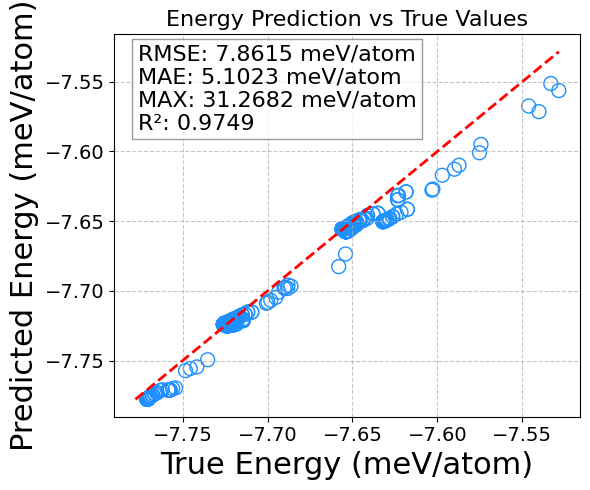

(0.007861458723115866,
 0.03126822203816726,
 0.9749033232382702,
 0.005102301699945758)

In [28]:
plot_regression(
    corrected_energies,
    predict_energy,
    unit='meV/atom',
    scale_factor=1000,
    property_name='Energy'
)

2, force

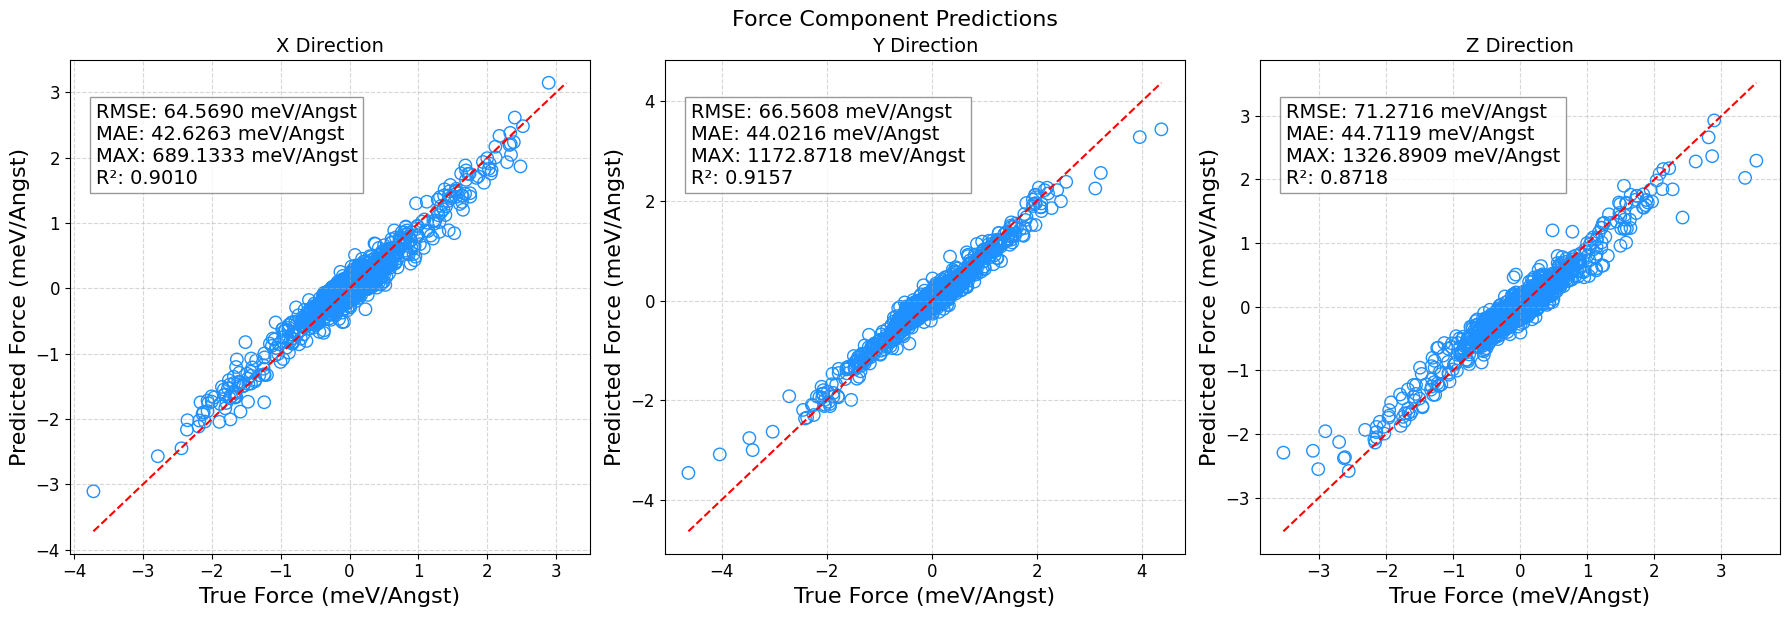

((0.06456895605885735,
  0.6891333033215332,
  0.9009910651749097,
  0.042626319291621015),
 (0.06656084286640496,
  1.172871837824097,
  0.9156745203282559,
  0.04402158881741224),
 (0.0712716023830702,
  1.3268909450775146,
  0.8717914268510203,
  0.0447118938230743))

In [29]:
plot_force_components(
    all_force_x, predict_force_x,
    all_force_y, predict_force_y,
    all_force_z, predict_force_z,
    unit='meV/Angst',
    scale_factor=1000
)

3, stress

Train RMSE 0.2514 GPa
Train MAE 0.1507 GPa
Train MAX 2.7724 GPa
Train R2 0.9142


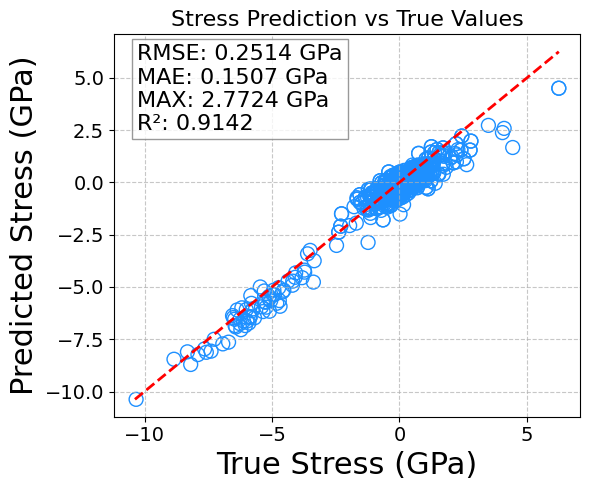

(0.25144335816785823,
 2.7724220048925785,
 0.914229776381792,
 0.15068936593177934)

In [30]:
plot_regression(
    flattened_stresses,
    predict_stress,
    unit='GPa',
    scale_factor=1,  # 不需要单位转换
    property_name='Stress'
)